In [164]:
import pandas as pd
from scipy import stats
import numpy as np
import pylab 

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

### Первая часть

In [55]:
# загружаем датасет
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [56]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Посчитать руками статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$ для поля mean symmetry

In [57]:
# your solution is here
mean = df['mean symmetry'].sum() / df.shape[0]
s_2 = ((df['mean symmetry'] - mean) ** 2).sum() / (df.shape[0] - 1)
sorted_sample = sorted(df['mean symmetry'])

if df.shape[0] % 2 == 0:
    mu = (sorted_sample[df.shape[0] // 2 - 1] + sorted_sample[df.shape[0] // 2]) / 2
    x_75 = (sorted_sample[df.shape[0] * 3 // 4 - 1] + sorted_sample[df.shape[0] * 3 // 4]) / 2
    x_25 = (sorted_sample[df.shape[0] // 4 - 1] + sorted_sample[df.shape[0] // 4]) / 2
else:
    mu = sorted_sample[df.shape[0] // 2]
    x_75 = sorted_sample[df.shape[0] * 3 // 4]
    x_25 = sorted_sample[df.shape[0] // 4]

mode = stats.mode(df['mean symmetry'])
delt_x = x_75 - x_25
print(f'Mean: {mean}, s^2: {s_2}, mu: {mu}, mode: {mode.mode[0]}, X_75 - X_25 {delt_x}')

# get mode without stats
def sefmade_mode(sample):
    sample_dict = {}
    for val in sample:
        sample_dict.setdefault(val, 0)
        sample_dict[val] += 1

    mode_res = {'val': None, 'count': 0}
    for key in sample_dict.keys():
        if (sample_dict[key] > mode_res['count']):
            mode_res['count'] = sample_dict[key]
            mode_res['val'] = key
    return mode_res


sample = df['mean symmetry'].values

print(f"Self estimated mode (without stats): {sefmade_mode(sample)['val']}")


Mean: 0.18116186291739894, s^2: 0.0007515428211713162, mu: 0.1792, mode: 0.1601, X_75 - X_25 0.033800000000000024
Sef estimated mode: 0.1769


In [58]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### С помощью seaborn найти пару наиболее зависимых и независимых признаков среди первых 5

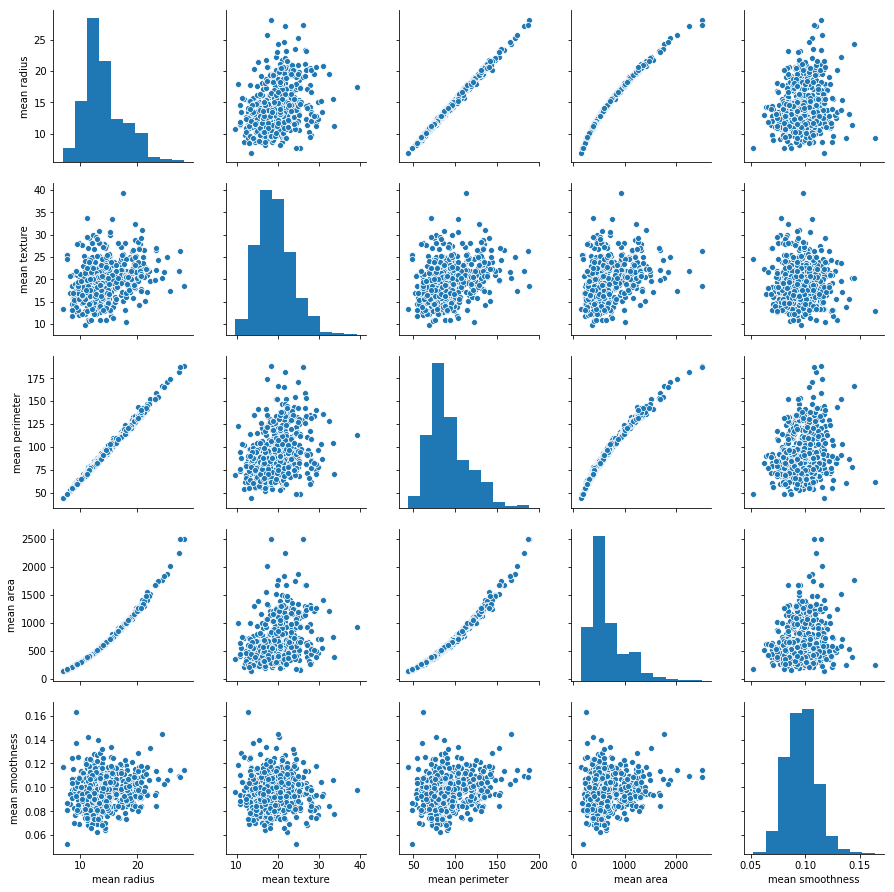

In [61]:
df.head()
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']])

# Наиболее зависимые - mean perimeter, mean radius
# Наиболее независимые - mean texture, mean smoothness

#### С помощью матрицы корреляций найти пару наиболее зависимых и независимых признаков среди первых 5

In [62]:
df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']].corr()
# Наиболее зависимые - mean perimeter, mean radius
# Наиболее независимые - mean texture, mean smoothness

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean area,0.987357,0.321086,0.986507,1.000000,0.177028
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


#### Проверить найденные пары t-тестом

In [80]:
t_most_dep = (df['mean perimeter'].mean() - df['mean radius'].mean()) \
    / (df['mean perimeter'].var() / df.shape[0] + df['mean radius'].var() / df.shape[0] ) ** 0.5


t_most_ind = (df['mean texture'].mean() - df['mean smoothness'].mean()) \
    / (df['mean texture'].var() / df.shape[0] + df['mean smoothness'].var() / df.shape[0] ) ** 0.5


ttest_most_dependent = stats.ttest_ind(df['mean perimeter'].values, df['mean radius'].values)
ttest_most_independent = stats.ttest_ind(df['mean texture'].values, df['mean smoothness'].values)

print(f'Self estimated t value for [mean perimeter, mean radius]: {t_most_dep}, Lib stats val: {ttest_most_dependent.statistic}')
print(f'Self estimated t value for [mean texture, mean smoothness]: {t_most_ind}, Lib stats val: {ttest_most_independent.statistic}')

Self estimated t value for [mean perimeter, mean radius]: 75.62417662792114, Lib stats val: 75.62417662792113
Self estimated t value for [mean texture, mean smoothness]: 106.44619509686162, Lib stats val: 106.44619509686147


Судя по результатам, гипотезу о том, что выборочные средние выбранных пар равны, придется откинуть, так как значение p-value слишком мало для обоих случаев!

#### Проверить руками гипотезу $H_0: M_{mean\ compactness} = 0$ 

In [157]:
t_val = (df['mean compactness'].mean() - 0) / (df['mean compactness'].var() ** 0.5 / df.shape[0] ** 0.5)

print(f'Выбранную гипотезу придется откинуть, так как значение t_val = {t_val}, что говорит о ее крайне низком уровне значимости')

Выбранную гипотезу придется откинуть, так как значение t_val = 47.12726263249827, что говорит о ее крайне низком уровне значимости


#### Нарисовать распределение признака worst texture с помощью
- диаграммы
- qq-plot
- эмпирическая ф.р.

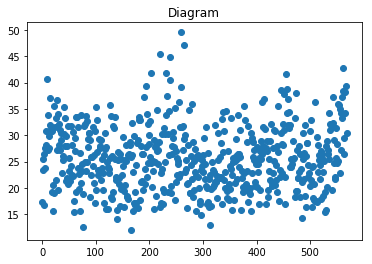

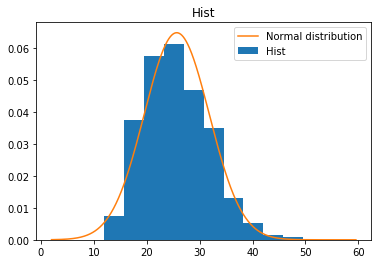

In [161]:
#diagram and hist
plt.title('Diagram')
plt.plot(df['worst texture'], linestyle="",marker="o")
plt.show()

#hist
x = np.linspace(df['worst texture'].min() - 10, df['worst texture'].max() + 10, 10000)
vals = stats.norm(df['worst texture'].mean(), df['worst texture'].var() ** 0.5).pdf(x)

plt.title('Hist')
plt.hist(df['worst texture'], label="Hist", density=True)
plt.plot(x, vals, label="Normal distribution")
plt.legend(loc='best')
plt.show()

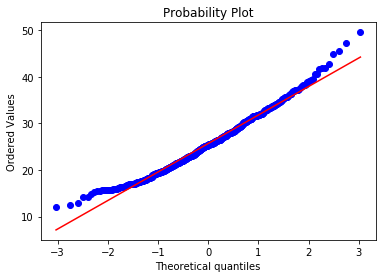

In [91]:
# qq-plot
stats.probplot(df['worst texture'], dist="norm", plot=pylab)
pylab.show()

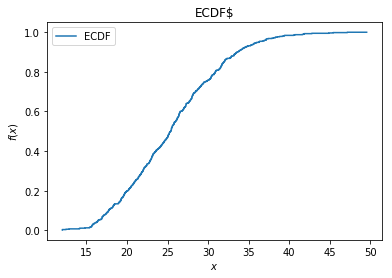

In [163]:
# эмпирическая ф-я распр.
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['worst texture'])
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.title(f"ECDF$")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

### Вторая часть

Сгенерируйте выборку из пуассоновского распределения $Pois(\theta)$ для $\theta = 2$, записав
ее в виде матрицы ${\{X_{ij}\}}_{i=1...N, j=1...K}$ где $N= 1000$ и $K = 10000$.

Выполните следующую процедуру для всех $n=2, ...N$. Для всех $j = 1...K$ по выборке $\{X_{ij}\}_{i=1...n}$ оцените параметр $\theta$ с помощью оценки выборочного среднего $\hat{\theta_j^n}$ и оценки $\tilde{\theta}_j^n = \frac{1}{n-1} \sum_{i=1}^n\left(X_{ij} - \frac1n \sum_{i=1}^n X_{ij}\right)^2$. По выборкам $\{\hat{\theta}_j^n\}_{j=1...K}$ и $\{\tilde{\theta}_j^n\}_{j=1...K}$ для этих двух типов оценок найдите оценки дисперсий $\hat{\sigma}_n$ $\tilde{\sigma}_n$

Нарисуйте график оценок дисперсий в зависимости от $n$. При необходимости не забывайте выставлять значение plt.ylim. Сделайте выводы. **Постарайтесь решить эту задачу без циклов, используя только функции библиотеки numpy**

Means variance for n = 1000, k = 10000, for n [2, 1000]: 0.013834600107125904
Vars variance for n = 1000, k = 10000, for n [2, 1000]: 0.03114894911935459


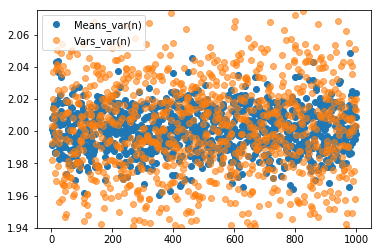

In [165]:
n = 1000
k = 10000

poiss = stats.poisson(2)
# generate
sample = poiss.rvs(size=(n, k))

# mean estimation
means_est = np.mean(sample[1:], axis=1)
means_est_var = means_est.var() ** 0.5

# var estimation
vars_est = np.var(sample[1:], axis=1)
vars_est_var =  vars_est.var() ** 0.5

print(f'Means variance for n = 1000, k = 10000, for n [2, 1000]: {means_est_var}')
print(f'Vars variance for n = 1000, k = 10000, for n [2, 1000]: {vars_est_var}')

n_linspace = np.linspace(1, n, n - 1)

plt.plot(n_linspace, means_est, label='Means_var(n)', linestyle="",marker="o")
plt.plot(n_linspace, vars_est, label='Vars_var(n)', linestyle="",marker="o", alpha=0.6)
plt.legend(loc='best')
plt.ylim(ymin=1.94, ymax=2.075)
plt.show()

Судя по результатам на графике, мы видим, что оценка дисперсий по данному распределению имеет гораздо больший разброс, нежели оценка средних. Об этом так же говорит результат подсчета  $\hat{\sigma}_n$ и $\tilde{\sigma}_n$, где в итоге $\tilde{\sigma}_n > \hat{\sigma}_n$
Так же можно сделать вывод, что выборочная дисперсия менее робастна, чем выборочное среднее. 